In [31]:
import numpy as np
import csv, sys
%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.interpolate import griddata
from matplotlib.ticker import MaxNLocator

In [254]:
with open('input2.csv', 'rb') as csvfile:
    data = list(csv.reader(csvfile, delimiter=','))
csv_data = np.array(data, dtype=np.double)
values = csv_data[:,2]
features = csv_data[:,[0,1]]
n = features.shape[0]
outputfilename = "out3.csv"

In [270]:
final_output = []

In [255]:
stddev = np.std(features, axis=0,ddof=1)

In [256]:
stddev_tiles = np.tile(stddev, (features.shape[0],1))
stddev_tiles

array([[1.91161892641583341934, 6.15654350333868372047],
       [1.91161892641583341934, 6.15654350333868372047],
       [1.91161892641583341934, 6.15654350333868372047],
       [1.91161892641583341934, 6.15654350333868372047],
       [1.91161892641583341934, 6.15654350333868372047],
       [1.91161892641583341934, 6.15654350333868372047],
       [1.91161892641583341934, 6.15654350333868372047],
       [1.91161892641583341934, 6.15654350333868372047],
       [1.91161892641583341934, 6.15654350333868372047],
       [1.91161892641583341934, 6.15654350333868372047],
       [1.91161892641583341934, 6.15654350333868372047],
       [1.91161892641583341934, 6.15654350333868372047],
       [1.91161892641583341934, 6.15654350333868372047],
       [1.91161892641583341934, 6.15654350333868372047],
       [1.91161892641583341934, 6.15654350333868372047],
       [1.91161892641583341934, 6.15654350333868372047],
       [1.91161892641583341934, 6.15654350333868372047],
       [1.91161892641583341934,

In [257]:
mean = np.mean(features, axis=0)
mean_tiles = np.tile(mean, (features.shape[0],1))
mean_tiles

array([[5.21050632911392330726, 18.30660430379746728136],
       [5.21050632911392330726, 18.30660430379746728136],
       [5.21050632911392330726, 18.30660430379746728136],
       [5.21050632911392330726, 18.30660430379746728136],
       [5.21050632911392330726, 18.30660430379746728136],
       [5.21050632911392330726, 18.30660430379746728136],
       [5.21050632911392330726, 18.30660430379746728136],
       [5.21050632911392330726, 18.30660430379746728136],
       [5.21050632911392330726, 18.30660430379746728136],
       [5.21050632911392330726, 18.30660430379746728136],
       [5.21050632911392330726, 18.30660430379746728136],
       [5.21050632911392330726, 18.30660430379746728136],
       [5.21050632911392330726, 18.30660430379746728136],
       [5.21050632911392330726, 18.30660430379746728136],
       [5.21050632911392330726, 18.30660430379746728136],
       [5.21050632911392330726, 18.30660430379746728136],
       [5.21050632911392330726, 18.30660430379746728136],
       [5.2105

array([[-0.02000000000000001776, -1.43293000000000070315],
       [0.02000000000000001776, 1.43292999999999892680]])

In [258]:
features = np.divide(np.add(features, -mean_tiles), stddev_tiles)
ones = np.ones((features.shape[0],1), dtype=np.integer)
features = np.append(ones, features, axis=1)
features

array([[1.00000000000000000000, -1.67946983823466466923,
        -1.31507790035217619895],
       [1.00000000000000000000, -1.65854516572423005272,
        -0.84957968719964216397],
       [1.00000000000000000000, -1.61146465257575211005,
        -1.11420219804789777385],
       [1.00000000000000000000, -1.56961530755488287703,
        -0.62807390245850236443],
       [1.00000000000000000000, -1.52776596253401342196,
        -0.92753089468152616348],
       [1.00000000000000000000, -1.48068544938553570134,
        -1.26478506967014037166],
       [1.00000000000000000000, -1.43883610436466624627,
        -0.87897280362964291811],
       [1.00000000000000000000, -1.39698675934379679120,
        -1.00538302059277429024],
       [1.00000000000000000000, -1.34990624619531907058,
        -0.25107502334048414916],
       [1.00000000000000000000, -1.30805690117444961551,
        -1.15280015481879294370],
       [1.00000000000000000000, -1.26620755615358038249,
        -0.78249659101490298685],

In [259]:
beta = np.zeros((1, features.shape[1]),dtype=float)

array([0.80524759999999995230, 0.91947409999999996089])

array([0.80524759999999995230, 0.91947409999999996089])

array([[1.00000000000000000000, 1.00000000000000000000],
       [-1.00000000000000000000, 1.00000000000000000000],
       [-1.00000000000000066613, 0.99999999999999933387]])

array([-0.80524759999999995230, -0.91947409999999996089])

In [271]:
alpha_values = [0.001, 0.005, 0.01, 0.05, 0.1, 0.4, 0.5, 1, 5, 10]
#r_value = []

iterations = 100
for alpha in alpha_values:
    #rval = []
    #print alpha
    for i in range(1, iterations+1):
        beta = beta - (alpha * np.sum((features.T) * (np.sum(beta * features, axis=1) - values), axis=1).reshape(1,3) / n)
        #rval.append(0.5 * np.sum(np.square(np.sum(beta * features, axis=1) - values)) / csv_data.shape[0])
    #r_value.append(rval)
    final_output.append([alpha, iterations] + beta.reshape(3).tolist())
    beta = np.zeros((1, features.shape[1]), dtype=float)

In [272]:
final_output

[[0.001, 100, 0.1043916796266313, 0.011962967192070476, 0.008633595555561502],
 [0.005, 100, 0.43225726708025014, 0.04562576717183785, 0.029814693921480024],
 [0.01, 100, 0.6951206934840981, 0.0686236380823034, 0.03893700612129118],
 [0.05, 100, 1.089969183119605, 0.11243317144538595, 0.018400280080915515],
 [0.1, 100, 1.0964316878594287, 0.12500553771969233, 0.005844982938081388],
 [0.4, 100, 1.0964608113924048, 0.12943814280355928, 0.0014123787784968511],
 [0.5, 100, 1.0964608113924048, 0.1294390290661913, 0.0014114925158648284],
 [1, 100, 1.096460811392405, 0.12943907603586852, 0.0014114455461874287],
 [5,
  100,
  -4.2063422096278994e+71,
  -4.422734969730153e+86,
  -4.4227349697301514e+86],
 [10,
  100,
  -1.3213588050300699e+104,
  -3.399340978890563e+119,
  -3.399340978890563e+119]]

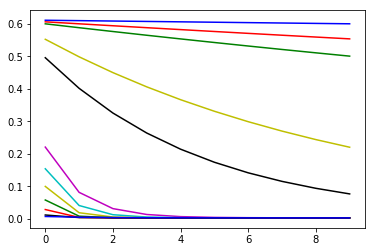

In [125]:
"""series = list(range(10))
plt.plot(series, r_value[0][:10],'b-',label='0.001')
plt.plot(series, r_value[1][:10],'r-',label='0.005')
plt.plot(series, r_value[2][:10],'g-',label='0.01')
plt.plot(series, r_value[3][:10],'y-',label='0.05')
plt.plot(series, r_value[4][:10],'k-',label='0.1')
plt.plot(series, r_value[5][:10],'m-',label='0.5')
plt.plot(series, r_value[11][:10],'b-',label='1')
#plt.plot(series, r_value[12],'r-',label='5')
#plt.plot(series, r_value[13],'g-',label='10')"""

In [273]:
with open(outputfilename, 'wb') as outputcsvfile:
        csvwriter = csv.writer(outputcsvfile, delimiter=',')
        for output in final_output:
            csvwriter.writerow(output)

NameError: name 'outputfilename' is not defined